In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [2]:
X, y = make_classification(n_samples=500, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Random Forest Classifier (Bagging)

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        64

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



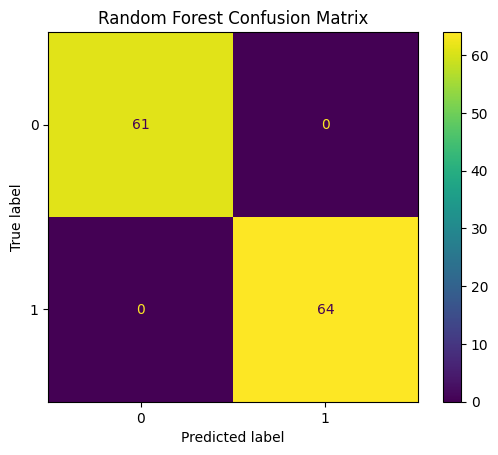

In [3]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

##  AdaBoost Classifier (Boosting)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.976
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.98      0.97      0.98        64

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



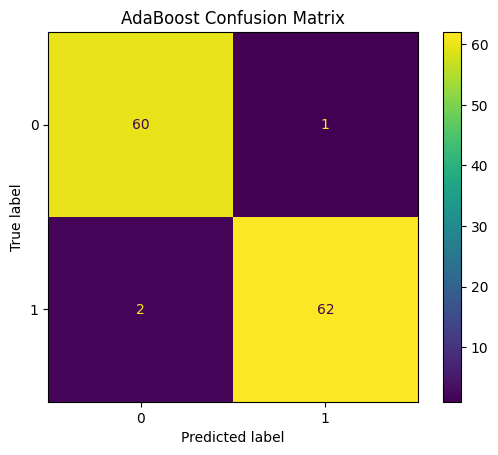

In [5]:
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
    random_state=0
)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test)
plt.title("AdaBoost Confusion Matrix")
plt.show()

## Gradient Boosting Classifier

Gradient Boost Accuracy: 0.984
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.98      0.98      0.98        64

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



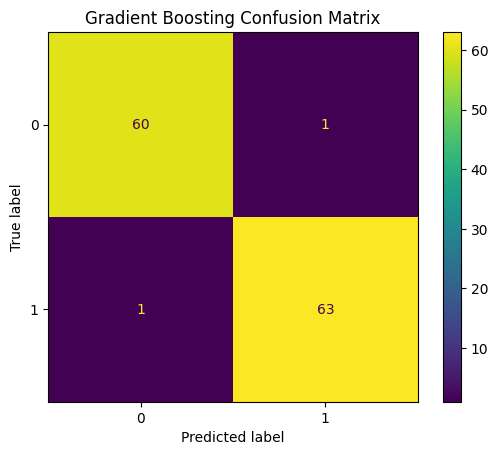

In [6]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boost Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

## XGBoost Classifier (Extreme Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                    use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [8]:
models = {
    "Random Forest": rfc,
    "AdaBoost": ada,
    "Gradient Boosting": gb,
}

for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy: {acc:.3f}")

Random Forest Accuracy: 1.000
AdaBoost Accuracy: 0.976
Gradient Boosting Accuracy: 0.984
